<a href="https://colab.research.google.com/github/Fatiha-Chaouche/ML_model_home_prices/blob/main/Cats_VS_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-09-28 20:10:39--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.209.109.125, 2600:1417:76:68c::317f, 2600:1417:76:68e::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.209.109.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  88.1MB/s    in 8.1s    

2023-09-28 20:10:47 (96.8 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



unzip

In [6]:
!unzip kagglecatsanddogs_5340.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflatin

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

Create Dataframe for Input and Output

In [8]:

input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/10252.jpg 0


In [9]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Dog/10610.jpg,1
1,PetImages/Dog/1276.jpg,1
2,PetImages/Dog/3181.jpg,1
3,PetImages/Cat/2983.jpg,0
4,PetImages/Cat/9150.jpg,0


In [20]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [22]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

In [23]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

Exploratory Data Analysis

In [24]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [25]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

<Axes: ylabel='count'>

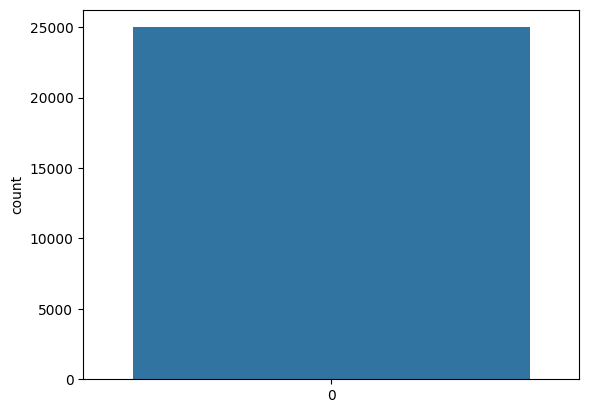

In [26]:
import seaborn as sns
sns.countplot(df['label'])

Create DataGenerator for the Images

In [27]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Dog/10610.jpg,1
1,PetImages/Dog/1276.jpg,1
2,PetImages/Dog/3181.jpg,1
3,PetImages/Cat/2983.jpg,0
4,PetImages/Cat/9150.jpg,0


In [28]:
# input split
from sklearn.model_selection import train_test_split  # Importe la fonction train_test_split de scikit-learn pour diviser les données en ensembles d'entraînement et de test.
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator( #Cette instance de ImageDataGenerator est configurée pour effectuer plusieurs opérations d'augmentation de données sur les images d'entraînement. Cela comprend la normalisation des images, la rotation, le cisaillement, le zoom, la retournement horizontal, et le remplissage en cas de transformation.
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255) #Cette instance de ImageDataGenerator est configurée uniquement pour normaliser les images de validation, sans effectuer d'augmentation.

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Creation

In [30]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)       

In [32]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 484s 12s/step - loss: 0.7713 - accuracy: 0.5331 - val_loss: 0.6643 - val_accuracy: 0.6536
Epoch 2/10
40/40 [==============================] - 465s 12s/step - loss: 0.6423 - accuracy: 0.6352 - val_loss: 0.6168 - val_accuracy: 0.6338
Epoch 3/10
40/40 [==============================] - 492s 12s/step - loss: 0.5943 - accuracy: 0.6812 - val_loss: 0.6046 - val_accuracy: 0.6740
Epoch 4/10
40/40 [==============================] - 452s 11s/step - loss: 0.5759 - accuracy: 0.6977 - val_loss: 0.5287 - val_accuracy: 0.7360
Epoch 5/10
40/40 [==============================] - 459s 11s/step - loss: 0.5512 - accuracy: 0.7182 - val_loss: 0.5143 - val_accuracy: 0.7450
Epoch 6/10
40/40 [==============================] - 462s 11s/step - loss: 0.5503 - accuracy: 0.7208 - val_loss: 0.5073 - val_accuracy: 0.7488
Epoch 7/10
40/40 [==============================] - 471s 12s/step - loss: 0.5238 - accuracy: 0.7385 - val_loss: 0.4834 - val_accuracy: 0.7662
Epoch 

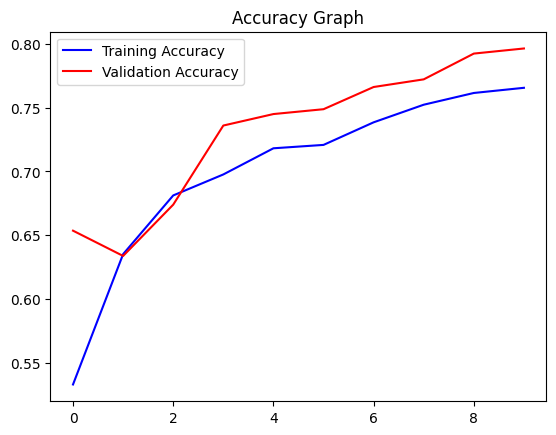

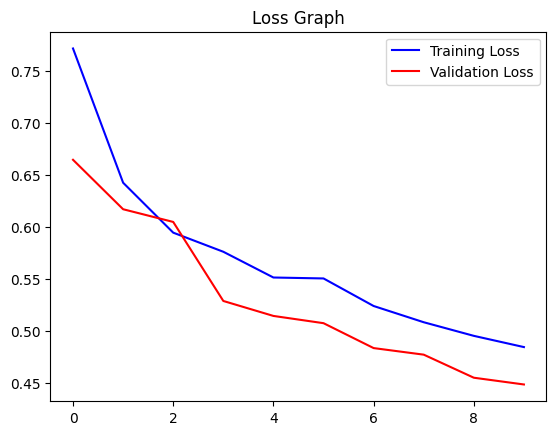

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()